In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

%matplotlib inline


from importnb import imports
with imports("ipynb"):
    import setUp 
    
X = setUp.X
y = setUp.y
X_train , X_test , y_train , y_test = setUp.X_train , setUp.X_test , setUp.y_train , setUp.y_test

In [4]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV

np.random.seed(42)

log_reg_grid = {
    "C" : np.logspace(-4 , 4, 30),
    "solver" :['liblinear']
}


gs_log_res = GridSearchCV(
    LogisticRegression(),
    param_grid=log_reg_grid,
    cv = 5,
    verbose=True
)


gs_log_res.fit(X_train , y_train)

Fitting 5 folds for each of 30 candidates, totalling 150 fits


GridSearchCV(cv=5, estimator=LogisticRegression(),
             param_grid={'C': array([1.00000000e-04, 1.88739182e-04, 3.56224789e-04, 6.72335754e-04,
       1.26896100e-03, 2.39502662e-03, 4.52035366e-03, 8.53167852e-03,
       1.61026203e-02, 3.03919538e-02, 5.73615251e-02, 1.08263673e-01,
       2.04335972e-01, 3.85662042e-01, 7.27895384e-01, 1.37382380e+00,
       2.59294380e+00, 4.89390092e+00, 9.23670857e+00, 1.74332882e+01,
       3.29034456e+01, 6.21016942e+01, 1.17210230e+02, 2.21221629e+02,
       4.17531894e+02, 7.88046282e+02, 1.48735211e+03, 2.80721620e+03,
       5.29831691e+03, 1.00000000e+04]),
                         'solver': ['liblinear']},
             verbose=True)

In [5]:
gs_log_res.best_params_

{'C': 0.20433597178569418, 'solver': 'liblinear'}

In [6]:
gs_log_res.score(X_test , y_test)

0.8852459016393442

SO base model was also 88.5%. We could improve little bit using more hyperparameters.

But now focus on the other things

2. Feature importance
3. Confusion matrix

4. Cross-validation

5. Precision

6. Recall

7. F1 score

8. Classification report

9. ROC curve

10. Area under the curve (AUC)

### Roc curve

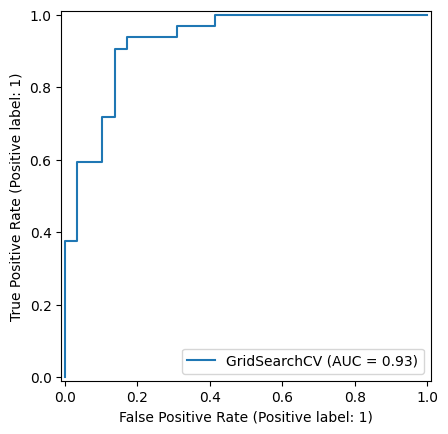

In [7]:
from sklearn.metrics import RocCurveDisplay

RocCurveDisplay.from_estimator(gs_log_res , X_test , y_test)
plt.show()

### Confusion matrix

In [8]:
y_pred = gs_log_res.predict(X_test)
y_pred

array([0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0,
       0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0])

In [9]:
y_test

179    0
228    0
111    1
246    0
60     1
      ..
249    0
104    1
300    0
193    0
184    0
Name: target, Length: 61, dtype: int64

In [10]:
from sklearn.metrics import  confusion_matrix

confusion_matrix = confusion_matrix(y_test , y_pred)

confusion_matrix

array([[25,  4],
       [ 3, 29]])

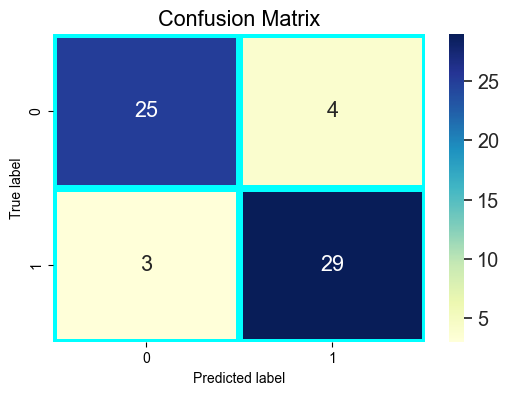

In [11]:
fig , ax = plt.subplots(figsize=(6 , 4))



sns.set_theme(font_scale=1.3)

sns.heatmap(
    confusion_matrix,
    annot=True,
    linewidths=5, # maybe similar to padding
    cmap="YlGnBu", # color scheme : Yellow-Green-Blue
    linecolor="cyan"
)


ax.set_title("Confusion Matrix")
    
plt.xlabel("Predicted label")
plt.ylabel("True label")


plt.show()

Next -

1. Classification report
2. Accuracy
3. Precision
....